In [2]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [3]:
# Load the VGG19 model
# https://keras.io/api/applications/vgg/#vgg19-function
model = VGG19(include_top=True, weights='imagenet')

In [4]:
# Define default image size for VGG19
image_size = (224, 224)

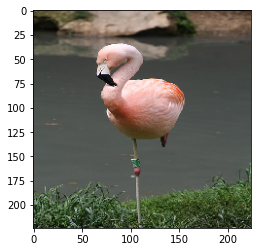

In [5]:
# Load the image and resize to default image size
image_path = os.path.join("..", "Images", "bird1.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [6]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [[('n02007558', 'flamingo', 0.9688598), ('n01855672', 'goose', 0.009939604), ('n02006656', 'spoonbill', 0.008081735)]]


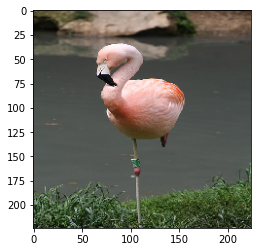

In [7]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [16]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
#     plt.imshow(img)
#     print('Predicted:', decode_predictions(predictions, top=3))
    return(decode_predictions(predictions, top=3))

Predicted: [[('n02123394', 'Persian_cat', 0.57299566), ('n02123159', 'tiger_cat', 0.14421184), ('n02123045', 'tabby', 0.0401777)]]


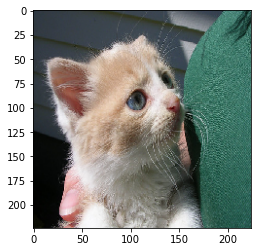

In [11]:
image_path2 = os.path.join("..", "Images", "kitten.jpg")
predict(image_path2)

In [20]:
kitty = predict(image_path2)
type(kitty)
kitty[0][0]

('n02123394', 'Persian_cat', 0.57299566)

Predicted: [[('n01622779', 'great_grey_owl', 0.9347003), ('n01608432', 'kite', 0.008001429), ('n02018795', 'bustard', 0.006982972)]]


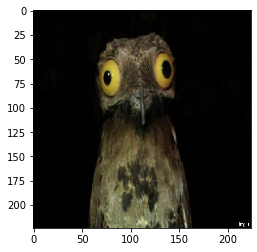

In [10]:
image_path = os.path.join("..", "Images", "bird2.jpg")
predict(image_path)